**Step-1:Read the data**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tele=pd.read_csv(r"C:\Users\HP\Downloads\telecom_churn_data (1).csv")
tele

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


**Step:2 Seprate Categorical and Numerical Columns**

In [3]:
cat=tele.select_dtypes(include='object').columns
num=tele.select_dtypes(exclude='object').columns

In [4]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [5]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

**Step:3 Data quick check**

In [6]:
tele.shape

(2000, 16)

In [7]:
tele.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [8]:
tele.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [9]:
tele.size

32000

In [10]:
tele.values

array([[2015, 100198, '409-8743', ..., 4.0, 1, 0.0],
       [2015, 100643, '340-5930', ..., 3.0, 2, 0.0],
       [2015, 100756, '372-3750', ..., 4.0, 5, 1.0],
       ...,
       [2015, 998474, '353-2080', ..., 5.0, 0, 0.0],
       [2015, 998934, '359-7788', ..., nan, 3, 0.0],
       [2015, 999961, '414-1496', ..., 3.0, 1, 1.0]], dtype=object)

In [11]:
tele.isnull()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


**Step 4 NULL VALUE ANANLYSIS**
- A) CHECK IF ANY NULL VALUE AS PRESENT\
- B) FILL NULL VALUES WITH MEDIAN OR KNNIMPUTER FOR NUMERICAL COLUMNS
- C) FILL THE NULL VALUES WITH MODE FOR CATEGORIES COLUMNS

In [12]:
tele.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [14]:
# gender is categorical columns then fill with mode 
tele['gender'].fillna(tele['gender'].mode()[0],inplace=True)

In [15]:
# maximum_days_inactive ,churn is a numerical columns then fill 
from sklearn.impute import KNNImputer
knn=KNNImputer()
tele['maximum_days_inactive']=knn.fit_transform(tele[['maximum_days_inactive']])
tele['maximum_days_inactive']=tele['maximum_days_inactive'].astype(int)

In [19]:
from sklearn.impute import KNNImputer
knn=KNNImputer()
tele['churn']=knn.fit_transform(tele[['churn']])
tele['churn']=tele[['churn']].astype(int)

In [20]:
tele.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [18]:
tele['phone_no'].value_counts()

phone_no
409-8743    1
419-5505    1
418-9385    1
347-1914    1
360-6309    1
           ..
330-8142    1
357-5801    1
420-5990    1
390-2891    1
414-1496    1
Name: count, Length: 2000, dtype: int64

**Step 5 DO SOME DATA PREPROCEING**

- IF ANY COLUMNS IS CPRRUPTED
- EX: NUMERICAL VALUES IN CATEGORICAL COLUMNS
- EX: CATOGORICAL VALUES IN NUMEIRCAL COLUMNS

In [21]:
for i in cat:
    print(f"Checking column: {i}")
    has_numeric=tele[i].str.contains(r'\d').any()
    if has_numeric:
        print(f"column '{i}' contains numeric value")

    else:
        print(f"columns '{i}' does not contains numeric value")

Checking column: phone_no
column 'phone_no' contains numeric value
Checking column: gender
columns 'gender' does not contains numeric value
Checking column: multi_screen
columns 'multi_screen' does not contains numeric value
Checking column: mail_subscribed
columns 'mail_subscribed' does not contains numeric value


**step 6 DROP THE  COLOUMN**
-       we drop this three columns
-      (['year','customer_id','phone_no']
-       WHICH MEANS A DATA HAS MORE UNIQUE LABLES  
-       AND DROP THE SINGLE VALUES COLUMNS

In [22]:
tele.drop(['year','customer_id','phone_no'],axis=1,inplace=True)

In [23]:
tele

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4,1,0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3,2,0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4,5,1
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3,3,0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4,2,0
1996,Male,45,127,no,no,273.45,9.3,30.99,116,3,3,1,0
1997,Male,53,94,no,no,128.85,15.6,14.60,110,16,5,0,0
1998,Male,40,94,no,no,178.05,10.4,20.18,100,6,3,3,0


**Step 7 CATEORICAL COLUMNS ANALYSIS**

- A) FREQUENCY TABLE
- B) BAR CHART
- C) PIE CHART
- A) Frequency Table:

In [24]:
import os 
cwd=os.getcwd()
folder="First_project_churn_data"
new_dir=os.path.join(cwd,folder)
try:
    os.makedirs(new_dir)

except Exception as e:
    print(e)

cat=tele.select_dtypes(include='object').columns
for i in cat:
    keys=tele[i].value_counts().keys()
    values=tele[i].value_counts().values
    col=["Lables",'No Of Count']
    df=pd.DataFrame(zip(keys,values),columns=col)
    name=f"{i}_table.csv"
    newfile=os.path.join(new_dir,name)
    df.to_csv(newfile)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\HP\\Documents\\Naresh IT\\EDA\\First_project_churn_data'


In [25]:
cat

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

**B) Bar Chart**

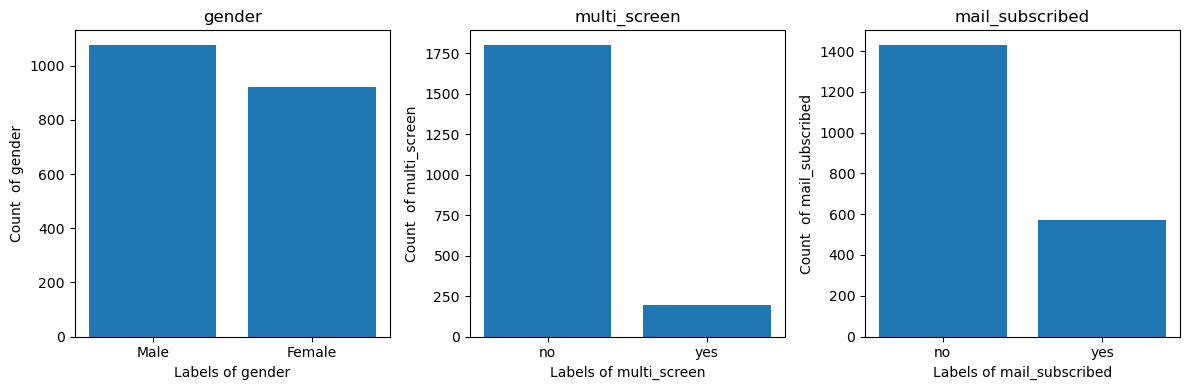

In [26]:
plt.figure(figsize=(12,4))
for idx, i in enumerate(cat,1):
    keys=tele[i].value_counts().keys()
    values=tele[i].value_counts().values
    plt.subplot(1,len(cat),idx)
    plt.xlabel(f"Labels of {i}")
    plt.ylabel(f"Count  of {i}")
    plt.title(i)
    plt.bar(keys,values)
plt.tight_layout()
plt.show()

**C) Pie Chart**

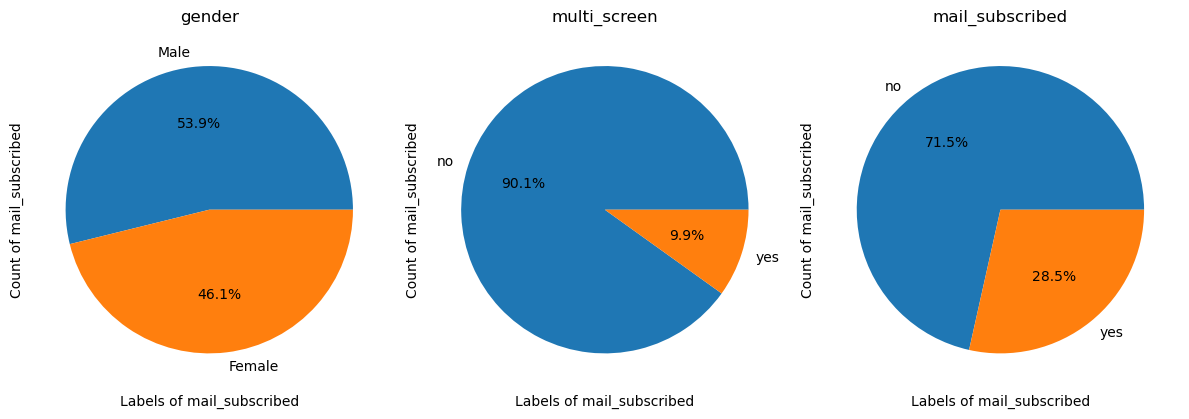

In [27]:
plt.figure(figsize=(12, 4))
for idx, col in enumerate(cat, 1):
    plt.subplot(1, len(cat), idx)
    tele[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        title=col,
        legend=False
    )
    plt.xlabel(f"Labels of {i}")
    plt.ylabel(f"Count of {i}")
     
plt.tight_layout()
plt.show()

**Step:8 NUMERICAL COLUMNS ANALYSIS**

- A) HISTOGRAM :
- B) DISTRIBUTION
- C) BOX PLOT

In [28]:
num=tele.select_dtypes(exclude='object').columns
num

Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn'],
      dtype='object')

In [29]:
num.shape

(10,)

**A) Histrogram**

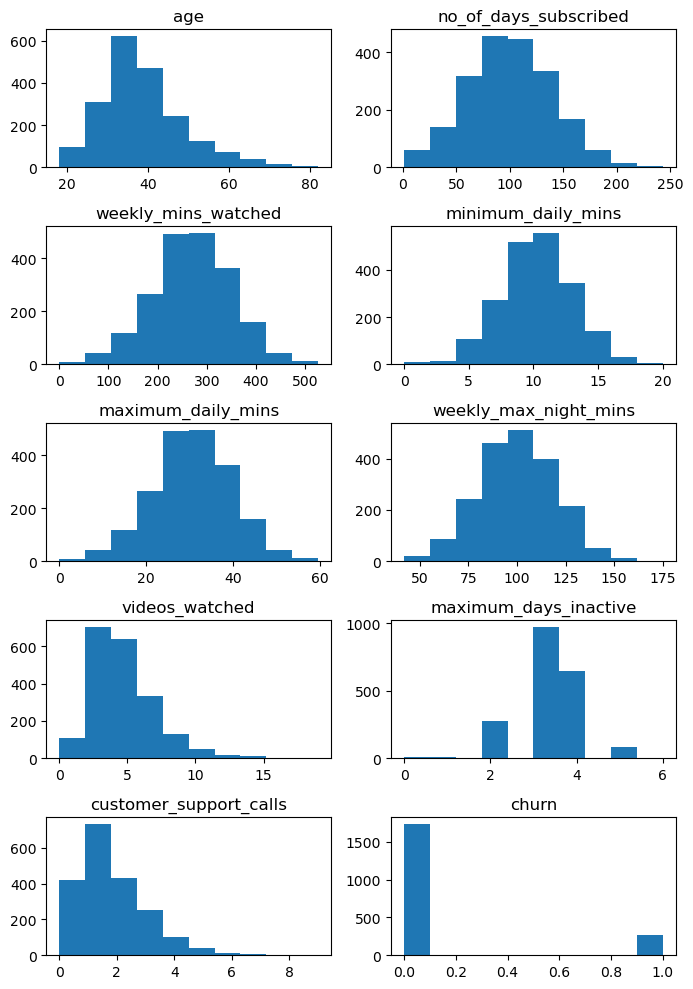

In [30]:
plt.figure(figsize=(7,10))
for idx, i in enumerate(num,1):
    plt.subplot(5,2,idx)
    plt.hist(tele[i])
    plt.title(i)
plt.tight_layout()
plt.show()

**B) Distribution plot**

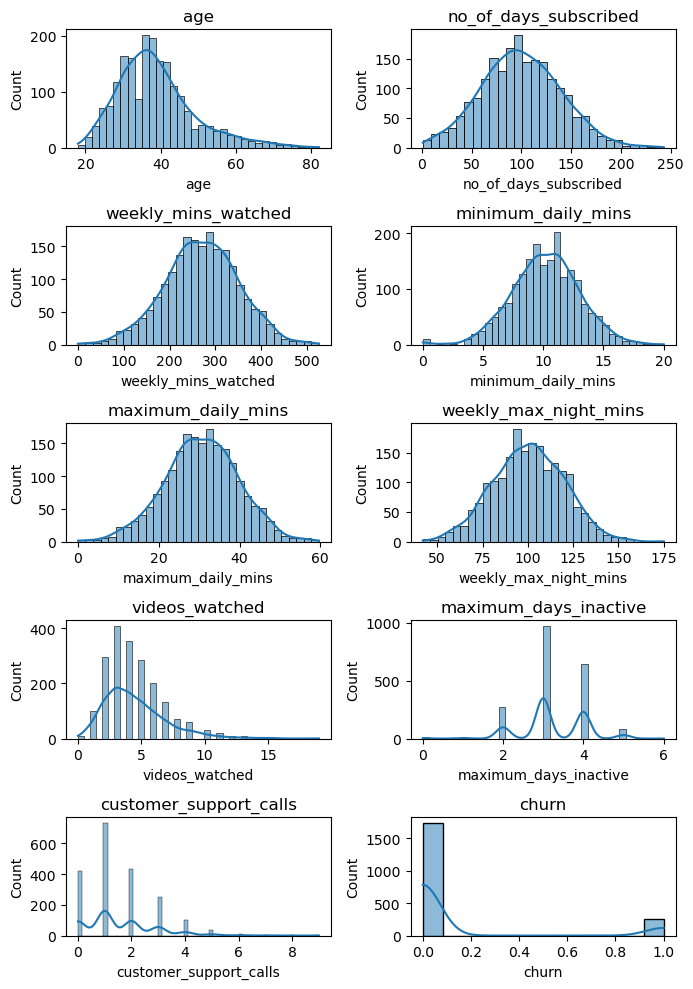

In [31]:
plt.figure(figsize=(7, 10))
for idx, i in enumerate(num, 1):
    plt.subplot(5, 2, idx)  
    sns.histplot(tele[i], kde=True)  
    plt.title(i)
plt.tight_layout()
plt.show()

**C) Box plot**

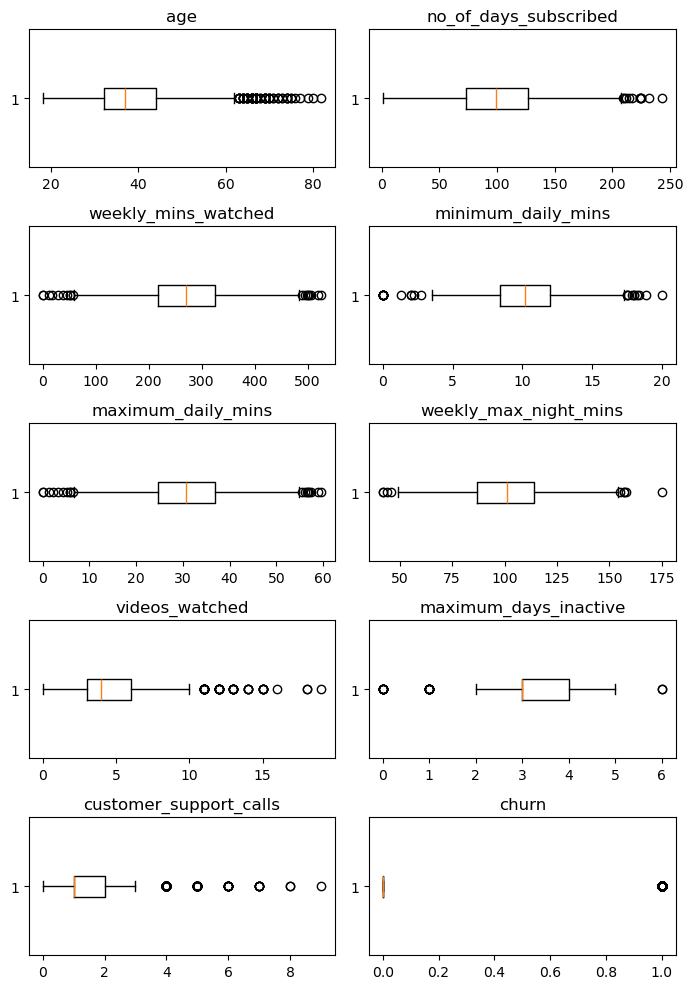

In [32]:
plt.figure(figsize=(7,10))
for idx, i in enumerate(num,1):
    plt.subplot(5,2,idx)
    plt.boxplot(tele[i],vert=False)
    plt.title(i)

plt.tight_layout()
plt.show()


**Step 9 OUTLIER ANALYSIS IMPUTE THE OUTLIER WITH MEDIAN**

In [53]:
for i in num:
    out=tele[i]
    Q1=np.percentile(out,25)
    Q3=np.percentile(out,75)
    IQR=Q3-Q1
    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR
    med=age.median()
    new=[]
    for i in age:
        if i<LB or i>UB:
            new.append(med)
        else:
            new.append(i)
    tele[i]=new

**Step :10 FIND THE CORREATION BETWEEN NUMERICAL COLUMNS HEAT MAP**



In [57]:
corr=tele.corr(numeric_only=True)
corr

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,1
age,1.000000,0.020416,0.016250,0.011062,0.016265,0.012450,0.002979,0.028392,-0.007193,NaN,NaN
no_of_days_subscribed,0.020416,1.000000,0.001131,0.039527,0.001123,0.003276,0.041836,0.036450,-0.014171,NaN,NaN
weekly_mins_watched,0.016250,0.001131,1.000000,-0.017170,1.000000,0.023476,-0.006443,-0.015092,-0.016288,NaN,NaN
minimum_daily_mins,0.011062,0.039527,-0.017170,1.000000,-0.017167,0.015625,0.025090,0.897625,-0.005016,NaN,NaN
maximum_daily_mins,0.016265,0.001123,1.000000,-0.017167,1.000000,0.023479,-0.006435,-0.015091,-0.016295,NaN,NaN
weekly_max_night_mins,0.012450,0.003276,0.023476,0.015625,0.023479,1.000000,0.004222,0.027609,0.013888,NaN,NaN
videos_watched,0.002979,0.041836,-0.006443,0.025090,-0.006435,0.004222,1.000000,0.013056,0.018412,NaN,NaN
maximum_days_inactive,0.028392,0.036450,-0.015092,0.897625,-0.015091,0.027609,0.013056,1.000000,0.000778,NaN,NaN
customer_support_calls,-0.007193,-0.014171,-0.016288,-0.005016,-0.016295,0.013888,0.018412,0.000778,1.000000,NaN,NaN
churn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

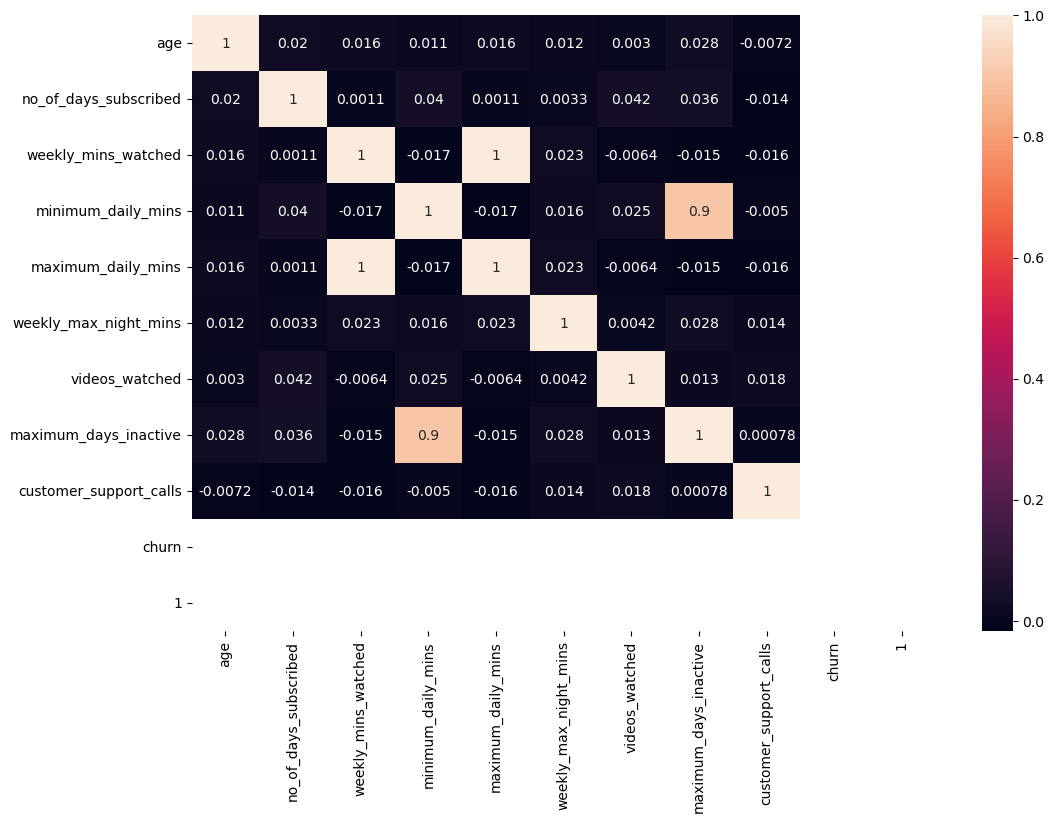

In [59]:
corr=tele.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

**Step :11 CONVERT CAT TO NUMEIRCAL**

- A) LABELENCODER
- B) ONEHOTENCODER

In [60]:
tele

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,1
0,Female,36.0,62.0,no,no,148.35,12.2,16.81,82.0,1.0,4.0,1.0,0.0,0.0
1,Female,39.0,149.0,no,no,294.45,7.7,33.37,87.0,3.0,3.0,2.0,0.0,0.0
2,Female,37.0,126.0,no,no,87.30,11.9,9.89,91.0,1.0,4.0,1.0,0.0,0.0
3,Female,24.0,131.0,no,yes,321.30,9.5,36.41,102.0,4.0,3.0,3.0,0.0,0.0
4,Female,40.0,191.0,no,no,243.00,10.9,27.54,83.0,7.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54.0,75.0,no,yes,182.25,11.3,20.66,97.0,5.0,4.0,2.0,0.0,0.0
1996,Male,45.0,127.0,no,no,273.45,9.3,30.99,116.0,3.0,3.0,1.0,0.0,0.0
1997,Male,53.0,94.0,no,no,128.85,15.6,14.60,110.0,4.0,5.0,0.0,0.0,0.0
1998,Male,40.0,94.0,no,no,178.05,10.4,20.18,100.0,6.0,3.0,3.0,0.0,0.0


In [70]:
cat

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    tele[i] = le.fit_transform(tele[i]) 
tele_num_format = tele
tele_num_format


,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,1
0,0,36.0,62.0,0,0,148.35,12.2,16.81,82.0,1.0,4.0,1.0,0.0,0.0
1,0,39.0,149.0,0,0,294.45,7.7,33.37,87.0,3.0,3.0,2.0,0.0,0.0
2,0,37.0,126.0,0,0,87.30,11.9,9.89,91.0,1.0,4.0,1.0,0.0,0.0
3,0,24.0,131.0,0,1,321.30,9.5,36.41,102.0,4.0,3.0,3.0,0.0,0.0
4,0,40.0,191.0,0,0,243.00,10.9,27.54,83.0,7.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,54.0,75.0,0,1,182.25,11.3,20.66,97.0,5.0,4.0,2.0,0.0,0.0
1996,1,45.0,127.0,0,0,273.45,9.3,30.99,116.0,3.0,3.0,1.0,0.0,0.0
1997,1,53.0,94.0,0,0,128.85,15.6,14.60,110.0,4.0,5.0,0.0,0.0,0.0
1998,1,40.0,94.0,0,0,178.05,10.4,20.18,100.0,6.0,3.0,3.0,0.0,0.0


**Step: 12. SCALE THE DATA**

- A) Z STANDARDIAZATION
- B) NORMALIAZATION

**A) Standardization (Z-score Normalization)**

In [73]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in tele_num_format:
    tele_num_format[i]=ss.fit_transform(tele_num_format[[i]])
tele_Zstan=tele_num_format
tele_Zstan

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,1
0,-1.080207,-0.196365,-0.958187,-0.331478,-0.631349,-1.579444,0.758523,-1.579855,-0.961376,-1.572207,0.978053,-0.279328,0.0,0.0
1,-1.080207,0.152005,1.290199,-0.331478,-0.631349,0.310695,-0.974231,0.310522,-0.699877,-0.607515,-0.363584,0.795010,0.0,0.0
2,-1.080207,-0.080241,0.695798,-0.331478,-0.631349,-2.369266,0.643006,-2.369794,-0.490677,-1.572207,0.978053,-0.279328,0.0,0.0
3,-1.080207,-1.589844,0.825015,-0.331478,1.583910,0.658061,-0.281130,0.657547,0.084621,-0.125169,-0.363584,1.869347,0.0,0.0
4,-1.080207,0.268129,2.375626,-0.331478,-0.631349,-0.354929,0.257949,-0.354991,-0.909076,1.321869,-0.363584,-0.279328,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.080207,1.893855,-0.622221,-0.331478,1.583910,-1.140870,0.411972,-1.140365,-0.176878,0.357177,0.978053,0.795010,0.0,0.0
1996,0.925748,0.848745,0.721641,-0.331478,-0.631349,0.039012,-0.358141,0.038837,0.816819,-0.607515,-0.363584,-0.279328,0.0,0.0
1997,0.925748,1.777732,-0.131195,-0.331478,-0.631349,-1.831721,2.067714,-1.832133,0.503020,-0.125169,2.319690,-1.353665,0.0,0.0
1998,0.925748,0.268129,-0.131195,-0.331478,-0.631349,-1.195206,0.065421,-1.195158,-0.019979,0.839523,-0.363584,1.869347,0.0,0.0


**B):Min-Max Scaling (Normalization)**

In [76]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
for i in tele_num_format:
    tele_num_format[i]=mm.fit_transform(tele_num_format[[i]])

tele_Min_Max=tele_num_format
tele_Min_Max

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,1
0,0.0,0.409091,0.294686,0.0,0.0,0.209894,0.630435,0.209728,0.314286,0.1,0.666667,0.333333,0.0,0.0
1,0.0,0.477273,0.714976,0.0,0.0,0.554064,0.304348,0.553939,0.361905,0.3,0.333333,0.666667,0.0,0.0
2,0.0,0.431818,0.603865,0.0,0.0,0.066078,0.608696,0.065891,0.400000,0.1,0.666667,0.333333,0.0,0.0
3,0.0,0.136364,0.628019,0.0,1.0,0.617314,0.434783,0.617127,0.504762,0.4,0.333333,1.000000,0.0,0.0
4,0.0,0.500000,0.917874,0.0,0.0,0.432862,0.536232,0.432758,0.323810,0.7,0.333333,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.818182,0.357488,0.0,1.0,0.289753,0.565217,0.289753,0.457143,0.5,0.666667,0.666667,0.0,0.0
1996,1.0,0.613636,0.608696,0.0,0.0,0.504594,0.420290,0.504469,0.638095,0.3,0.333333,0.333333,0.0,0.0
1997,1.0,0.795455,0.449275,0.0,0.0,0.163958,0.876812,0.163791,0.580952,0.4,1.000000,0.000000,0.0,0.0
1998,1.0,0.500000,0.449275,0.0,0.0,0.279859,0.500000,0.279776,0.485714,0.6,0.333333,1.000000,0.0,0.0
